## Isolation Forest

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import eif

#Load the Data
df = pd.read_csv('breastcancer.csv')

df.head(10)

,0,1,2,3,4,5,6,7,8,Class
0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,0
1,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,0
2,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,0
3,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,0
4,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,0
5,8.0,10.0,10.0,8.0,7.0,10.0,9.0,7.0,1.0,1
6,1.0,1.0,1.0,1.0,2.0,10.0,3.0,1.0,1.0,0
7,2.0,1.0,2.0,1.0,2.0,1.0,3.0,1.0,1.0,0
8,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,5.0,0
9,4.0,2.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,0


In [4]:
#EIF function requires numpy array
X = df.values

forest = eif.iForest(X, 
                 ntrees=1000, 
                 sample_size=100, 
                 ExtensionLevel=8)

scores = forest.compute_paths(X_in=X)
df['Score'] = scores #Append the scores to our dataframe for easy plottin'

Average Anomaly Score for Benign: 0.380
Average Anomaly Score for Malignant: 0.560


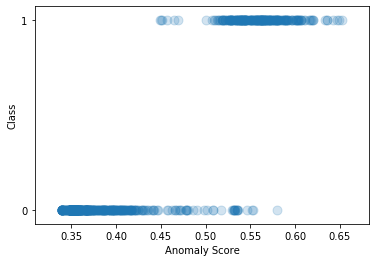

In [6]:
df_m = df[df['Class'] == 1.0]
df_b = df[df['Class'] == 0.0]

print("Average Anomaly Score for Benign: " + "%.3f" % df_b['Score'].mean())
print("Average Anomaly Score for Malignant: " + "%.3f" % df_m['Score'].mean())

df.plot.scatter(x='Score', 
                y='Class', 
                s=80, 
                alpha=0.2)

plt.yticks([0, 1])
plt.xlabel('Anomaly Score')
plt.show()